In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the uploaded files
data_dictionary = pd.read_csv("/content/data_dictionary.csv")
orders = pd.read_csv("/content/orders.csv")
pizza_types = pd.read_csv("/content/pizza_types.csv", encoding='latin-1')
pizza=pd.read_csv("/content/pizzas.csv")
order_details=pd.read_csv("/content/order_details.csv")

In [ ]:
# Displaying the first few rows of each file to understand their structure
data_dictionary.head()

,Table,Field,Description
0,orders,order_id,Unique identifier for each order placed by a t...
1,orders,date,Date the order was placed (entered into the sy...
2,orders,time,Time the order was placed (entered into the sy...
3,order_details,order_details_id,Unique identifier for each pizza placed within...
4,order_details,order_id,Foreign key that ties the details in each orde...


In [ ]:
orders.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [ ]:
pizza_types.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [ ]:
order_details.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [ ]:
pizza.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [ ]:
data_dictionary.isnull().sum()

,0
Table,0
Field,0
Description,0


In [ ]:
orders.isnull().sum()

,0
order_id,0
date,0
time,0


In [ ]:
pizza_types.isnull().sum()

,0
pizza_type_id,0
name,0
category,0
ingredients,0


In [ ]:
pizza.isnull().sum()

,0
pizza_id,0
pizza_type_id,0
size,0
price,0


In [ ]:
order_details.isnull().sum()

,0
order_details_id,0
order_id,0
pizza_id,0
quantity,0


# 1. How many customers do we have each day? Are there any peak hours?

In [ ]:
# Check the columns in the 'orders' DataFrame
print(orders.columns)

Index(['order_id', 'date', 'time'], dtype='object')


In [ ]:
# Convert the 'date' column to datetime if not already
orders['date'] = pd.to_datetime(orders['date'])

# Count the number of customers (orders) per day
customers_per_day = orders.groupby('date')['order_id'].count().reset_index()
customers_per_day.columns = ['date', 'customer_count']

print("\nNumber of Customers Each Day:")
print(customers_per_day.head())  # Display the first few days


Number of Customers Each Day:
        date  customer_count
0 2015-01-01              69
1 2015-01-02              67
2 2015-01-03              66
3 2015-01-04              52
4 2015-01-05              54


In [ ]:

# Convert the 'time' column to datetime if not already
orders['time'] = pd.to_datetime(orders['time'], format='%H:%M:%S')

# Extract the hour from the 'time' column
orders['hour'] = orders['time'].dt.hour

# Count the number of orders for each hour
orders_per_hour = orders.groupby('hour')['order_id'].count().reset_index()
orders_per_hour.columns = ['hour', 'order_count']

# Identify peak hours
peak_hours = orders_per_hour.sort_values(by='order_count', ascending=False).head(5)

print("\nOrders Per Hour:")
print(orders_per_hour)

print("\nPeak Hours:")
print(peak_hours)


Orders Per Hour:
    hour  order_count
0      9            1
1     10            8
2     11         1231
3     12         2520
4     13         2455
5     14         1472
6     15         1468
7     16         1920
8     17         2336
9     18         2399
10    19         2009
11    20         1642
12    21         1198
13    22          663
14    23           28

Peak Hours:
    hour  order_count
3     12         2520
4     13         2455
9     18         2399
8     17         2336
10    19         2009


In [ ]:
# 1. Calculate the number of pizzas in an order
pizzas_per_order = order_details.groupby('order_id')['quantity'].sum().reset_index(name='total_pizzas')
print("Number of Pizzas per Order:")
print(pizzas_per_order)

Number of Pizzas per Order:
       order_id  total_pizzas
0             1             1
1             2             5
2             3             2
3             4             1
4             5             1
...         ...           ...
21345     21346             4
21346     21347             4
21347     21348             3
21348     21349             1
21349     21350             1

[21350 rows x 2 columns]


2.How many pizzas are typically in an order? Do we have any bestsellers?

In [ ]:
# Calculate the average number of pizzas per order
average_pizzas_per_order = pizzas_per_order['total_pizzas'].mean()

print(f"Average Number of Pizzas Per Order: {average_pizzas_per_order:.2f}")

Average Number of Pizzas Per Order: 2.32


In [ ]:
# 2. Find bestselling pizzas
bestselling_pizzas = order_details.groupby('pizza_id')['quantity'].sum().sort_values(ascending=False).reset_index()
bestselling_pizzas.columns = ['pizza_id', 'total_quantity']
print("\nBestselling Pizzas:")
print(bestselling_pizzas)


Bestselling Pizzas:
          pizza_id  total_quantity
0       big_meat_s            1914
1       thai_ckn_l            1410
2    five_cheese_l            1409
3    four_cheese_l            1316
4    classic_dlx_m            1181
..             ...             ...
86      mexicana_s             162
87     calabrese_s              99
88   ckn_alfredo_s              96
89  green_garden_l              95
90   the_greek_xxl              28

[91 rows x 2 columns]


In [ ]:
# Instead of 'best_sellers', use 'bestselling_pizzas' which is already defined
bestselling_pizzas = bestselling_pizzas.sort_values(by='total_quantity', ascending=False)

# Display top 5 best-selling pizzas
print("\nTop 5 Best-Selling Pizzas:")
print(bestselling_pizzas.head())


Top 5 Best-Selling Pizzas:
        pizza_id  total_quantity
0     big_meat_s            1914
1     thai_ckn_l            1410
2  five_cheese_l            1409
3  four_cheese_l            1316
4  classic_dlx_m            1181


3. How much money did we make this year? Can we identify any seasonality in the sales?


In [ ]:
# Step 1: Check for duplicates in the pizzas DataFrame
duplicate_pizza = pizza[pizza.duplicated(subset='pizza_id', keep=False)]
if not duplicate_pizza.empty:
    print("\nDuplicates found in 'pizzas':")
    print(duplicate_pizza)

# Drop duplicate rows in pizzas DataFrame based on 'pizza_id'
pizza = pizza.drop_duplicates(subset='pizza_id')

# Step 2: Merge order_details with pizzas to include prices
order_details = order_details.merge(
    pizza[['pizza_id', 'price']],
    on='pizza_id',
    how='left',
    suffixes=('', '_pizza')  # Avoid column name conflicts
)

# Step 3: Calculate total price for each order line
order_details['total_price'] = order_details['quantity'] * order_details['price']

# Step 4: Convert 'date' column in orders DataFrame to datetime
orders['date'] = pd.to_datetime(orders['date'])

# Step 5: Drop or rename the conflicting 'date' column
if 'date' in order_details.columns:
    order_details = order_details.rename(columns={'date': 'date_order_details'})

# Merge order_details with orders to include date information
order_details = order_details.merge(
    orders[['order_id', 'date']],
    on='order_id',
    how='left'
)

# Rename the resulting date column
order_details.rename(columns={'date': 'order_date'}, inplace=True)

# Step 6: Calculate yearly revenue
total_revenue = order_details['total_price'].sum()
print(f"\nTotal Revenue for the Year: ${total_revenue:,.2f}")

# Step 7: Analyze monthly revenue
order_details['month'] = order_details['order_date'].dt.month
monthly_revenue = order_details.groupby('month')['total_price'].sum().reset_index()
monthly_revenue.columns = ['month', 'total_revenue']

print("\nMonthly Revenue:")
print(monthly_revenue)



Total Revenue for the Year: $817,860.05

Monthly Revenue:
    month  total_revenue
0       1       69793.30
1       2       65159.60
2       3       70397.10
3       4       68736.80
4       5       71402.75
5       6       68230.20
6       7       72557.90
7       8       68278.25
8       9       64180.05
9      10       64027.60
10     11       70395.35
11     12       64701.15


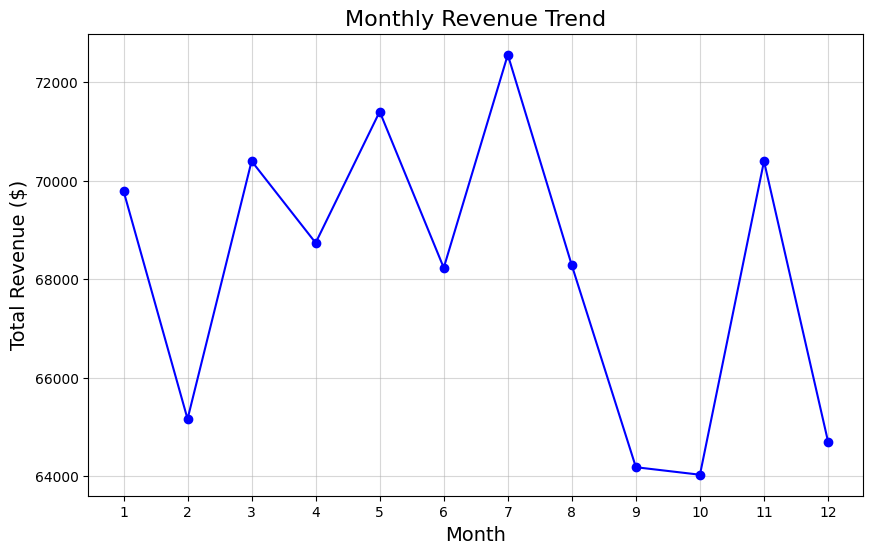

In [ ]:
# Identify seasonality
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue['month'], monthly_revenue['total_revenue'], marker='o', linestyle='-', color='b')
plt.title('Monthly Revenue Trend', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Revenue ($)', fontsize=14)
plt.xticks(range(1, 13))
plt.grid(alpha=0.5)
plt.show()

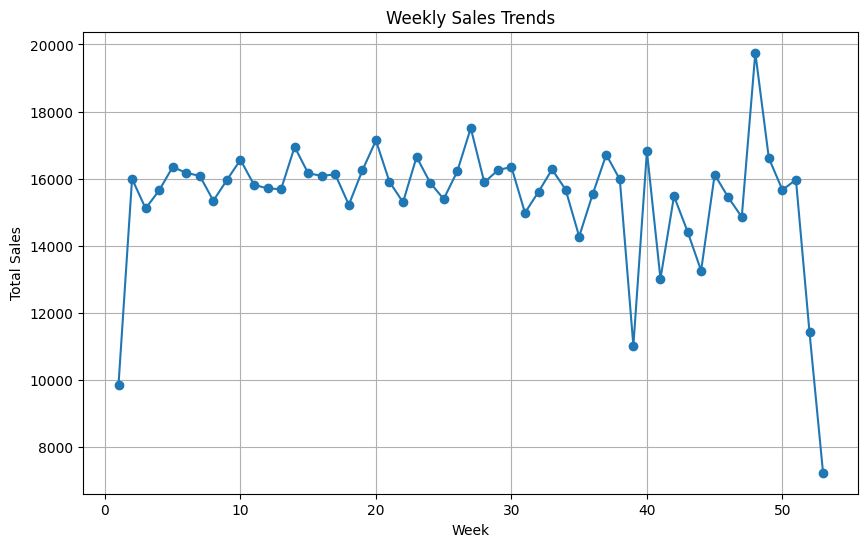

In [ ]:
#  Weekly sales trends
orders['week'] = orders['date'].dt.isocalendar().week
weekly_sales = order_details.merge(orders[['order_id', 'week']], on='order_id', how='left')
weekly_sales = weekly_sales.groupby('week')['total_price'].sum().reset_index()

# Plot the weekly sales trends
plt.figure(figsize=(10, 6))
plt.plot(weekly_sales['week'], weekly_sales['total_price'], marker='o')
plt.title('Weekly Sales Trends')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

4. Are there any pizzas we should take off the menu, or any promotions we could leverage?

In [ ]:
# Merge order details with pizza information
order_details = order_details.merge(pizza, on='pizza_id', how='left')

# Calculate total quantity sold per pizza
pizza_sales = order_details.groupby('pizza_id')['quantity'].sum().reset_index()
pizza_sales.columns = ['pizza_id', 'total_quantity']

# 1. Identify low-performing pizzas
low_performers = pizza_sales[pizza_sales['total_quantity'] < 10]  # Threshold: < 10 pizzas per year
print("Pizzas to Remove from the Menu:")
print(low_performers)

# 2. Identify top-performing pizzas for promotions
top_performers = pizza_sales.sort_values(by='total_quantity', ascending=False).head(5)  # Top 5 bestsellers
print("\nTop Pizzas for Promotions:")
print(top_performers)


Pizzas to Remove from the Menu:
Empty DataFrame
Columns: [pizza_id, total_quantity]
Index: []

Top Pizzas for Promotions:
         pizza_id  total_quantity
3      big_meat_s            1914
80     thai_ckn_l            1410
20  five_cheese_l            1409
21  four_cheese_l            1316
18  classic_dlx_m            1181


In [ ]:
# Merge pizza data to get ingredients
order_details = order_details.merge(pizza_types, left_on='pizza_id', right_on='pizza_type_id', how='left')

In [ ]:
# Break down ingredients by total sales
from collections import Counter

In [ ]:
ingredient_list = order_details['ingredients'].str.split(', ')
ingredients = Counter([ingredient for sublist in ingredient_list.dropna() for ingredient in sublist])

In [ ]:
# Top ingredients
top_ingredients = pd.DataFrame(ingredients.most_common(), columns=['Ingredient', 'Count'])
print("Top Ingredients by Usage:")
print(top_ingredients.head(10))

Top Ingredients by Usage:
Empty DataFrame
Columns: [Ingredient, Count]
Index: []


5. Customer Purchase Behavior


Most common pizza combinations

In [ ]:
# Group orders to find pizza combinations
from itertools import combinations
from collections import Counter

# Create a list of pizzas for each order
order_combinations = order_details.groupby('order_id')['pizza_id'].apply(list)

# Generate combinations of pizzas and count occurrences
combo_counter = Counter()
for order in order_combinations:
    if len(order) > 1:
        combos = combinations(sorted(order), 2)  # Adjust '2' for larger combos
        combo_counter.update(combos)

# Top combinations
top_combinations = pd.DataFrame(combo_counter.most_common(5), columns=['Combination', 'Count'])
print("\nTop Pizza Combinations:")
print(top_combinations)



Top Pizza Combinations:
                   Combination  Count
0     (big_meat_s, thai_ckn_l)    144
1  (big_meat_s, four_cheese_l)    126
2  (big_meat_s, five_cheese_l)    125
3  (big_meat_s, classic_dlx_m)    105
4   (big_meat_s, spicy_ital_l)    104


In [ ]:
print(pizza.columns)

Index(['pizza_id', 'pizza_type_id', 'size', 'price'], dtype='object')


In [ ]:
# Assuming your 'pizza' DataFrame has a column named 'cost_per_pizza' representing the cost
pizza['cost'] = pizza['price'] * 0.7
pizza['margin'] = (pizza['price'] - pizza['cost']) / pizza['price']
print("\nCalculated Margins:")
print(pizza[['pizza_id', 'price', 'cost', 'margin']])




Calculated Margins:
         pizza_id  price    cost  margin
0       bbq_ckn_s  12.75   8.925     0.3
1       bbq_ckn_m  16.75  11.725     0.3
2       bbq_ckn_l  20.75  14.525     0.3
3      cali_ckn_s  12.75   8.925     0.3
4      cali_ckn_m  16.75  11.725     0.3
..            ...    ...     ...     ...
91  spinach_fet_m  16.00  11.200     0.3
92  spinach_fet_l  20.25  14.175     0.3
93   veggie_veg_s  12.00   8.400     0.3
94   veggie_veg_m  16.00  11.200     0.3
95   veggie_veg_l  20.25  14.175     0.3

[96 rows x 4 columns]


Time Based Analysis

Price Elasticity

In [ ]:
# Analyze price sensitivity by comparing price vs. quantity sold
pizza_price_sensitivity = order_details.groupby('pizza_id').agg(
    average_price=('price', 'mean'),
    total_quantity=('quantity', 'sum')
).reset_index()
print(pizza_price_sensitivity)


         pizza_id  average_price  total_quantity
0       bbq_ckn_l          20.75             992
1       bbq_ckn_m          16.75             956
2       bbq_ckn_s          12.75             484
3      big_meat_s          12.00            1914
4    brie_carre_s          23.65             490
..            ...            ...             ...
86   the_greek_xl          25.50             552
87  the_greek_xxl          35.95              28
88   veggie_veg_l          20.25             427
89   veggie_veg_m          16.00             635
90   veggie_veg_s          12.00             464

[91 rows x 3 columns]


Product Pairing Analysis

In [ ]:
# You can use association rule mining to find product pairings, but here is a simple method:
pairings = order_details.groupby(['order_id', 'pizza_id'])['pizza_id'].count().reset_index(name='count')  # Rename the count column
pairings = pairings.pivot_table(index='order_id', columns='pizza_id', values='count', fill_value=0) # Specify values column

Customer Segmentation

In [ ]:
# Group by 'order_id' if 'customer_id' is not available
# Assuming 'order_details' has the 'total_price' column
frequent_customers = order_details.groupby('order_id').agg(
    total_purchases=('price', 'sum'),  # Use 'price' column from order_details
    num_orders=('order_id', 'count')
).reset_index()

# Filter for customers who made more than X orders
loyal_customers = frequent_customers[frequent_customers['num_orders'] > 5]
print(loyal_customers)

       order_id  total_purchases  num_orders
8             9           143.25           9
16           17           168.50          10
77           78            91.45           6
91           92           136.25           9
142         143           121.75           8
...         ...              ...         ...
21224     21225           182.90          11
21227     21228           232.25          14
21248     21249           178.45          11
21250     21251           177.45          11
21287     21288           171.45          11

[596 rows x 3 columns]
